<a href="https://colab.research.google.com/github/mwang-cmn/Diabetes_Prediction/blob/main/AI_Prediction_of_Diabetes_in_Women.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes Prediction**

## 🧩 Problem Statement
The task is to build a machine learning model that can classify the type of diabetes (e.g., Type 2 or gestational) in women based on health-related features.

In [1]:
# 📦 Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load train test set
path = '/content/drive/MyDrive/Colab Notebooks/Train.csv'
df = pd.read_csv(path)
df.head()


,Genetic Markers,Family History,Insulin Levels,Blood Glucose Levels,Glucose Tolerance Test,BMI,Waist Circumference,Physical Activity,Dietary Habits,Smoking Status,...,Blood Pressure,Cholesterol Levels,Liver Function Tests,Previous Gestational Diabetes,Pregnancy History,Weight Gain During Pregnancy,Ethnicity,Socioeconomic Factors,Target,ID
0,Negative,No,33,147,Abnormal,29,34,Moderate,Healthy,Non-Smoker,...,125,207,Normal,No,Complications,28,Low Risk,Low,Type 2 Diabetes,ID_0000ff
1,Negative,Yes,20,118,Normal,24,35,High,Unhealthy,Non-Smoker,...,121,210,Normal,Yes,Complications,15,High Risk,Medium,Prediabetic,ID_000372
2,Negative,Yes,14,142,Abnormal,22,30,Low,Healthy,Non-Smoker,...,90,167,Normal,Yes,Complications,13,Low Risk,Low,Type 1 Diabetes,ID_0005b8
3,Negative,Yes,38,141,Abnormal,27,34,High,Healthy,Smoker,...,119,219,Normal,No,Normal,25,Low Risk,High,Type 2 Diabetes,ID_000f18
4,Positive,Yes,20,120,Abnormal,24,36,Low,Unhealthy,Smoker,...,120,223,Normal,Yes,Complications,10,Low Risk,Medium,Gestational Diabetes,ID_0011f6


In [4]:
# Load test set
path1 = '/content/drive/MyDrive/Colab Notebooks/Test.csv'
test = pd.read_csv(path1)
test.head()

,Genetic Markers,Family History,Insulin Levels,Blood Glucose Levels,Glucose Tolerance Test,BMI,Waist Circumference,Physical Activity,Dietary Habits,Smoking Status,Alcohol Consumption,Blood Pressure,Cholesterol Levels,Liver Function Tests,Previous Gestational Diabetes,Pregnancy History,Weight Gain During Pregnancy,Ethnicity,Socioeconomic Factors,ID
0,Positive,No,19,103,Normal,25,32,Moderate,Healthy,Smoker,Moderate,120,186,Abnormal,No,Complications,15,High Risk,High,ID_001258
1,Positive,No,11,117,Normal,32,31,Low,Healthy,Smoker,Low,126,216,Normal,Yes,Normal,16,Low Risk,Medium,ID_002548
2,Negative,No,10,118,Normal,26,39,Low,Unhealthy,Non-Smoker,High,123,214,Abnormal,No,Complications,18,Low Risk,High,ID_002c87
3,Positive,Yes,15,111,Normal,25,35,High,Unhealthy,Non-Smoker,Low,116,220,Normal,No,Complications,20,High Risk,Medium,ID_004b83
4,Positive,Yes,13,101,Abnormal,27,30,Low,Unhealthy,Non-Smoker,Moderate,127,175,Normal,No,Complications,17,High Risk,Low,ID_005d09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15094 entries, 0 to 15093
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Genetic Markers                15094 non-null  object
 1   Family History                 15094 non-null  object
 2   Insulin Levels                 15094 non-null  int64 
 3   Blood Glucose Levels           15094 non-null  int64 
 4   Glucose Tolerance Test         15094 non-null  object
 5   BMI                            15094 non-null  int64 
 6   Waist Circumference            15094 non-null  int64 
 7   Physical Activity              15094 non-null  object
 8   Dietary Habits                 15094 non-null  object
 9   Smoking Status                 15094 non-null  object
 10  Alcohol Consumption            15094 non-null  object
 11  Blood Pressure                 15094 non-null  int64 
 12  Cholesterol Levels             15094 non-null  int64 
 13  L

## **Data Understanding**
There are 20 feature columns in the train and test datasets and, 1 target variable(Target) which describes the Type of Diabetes.

| Column Name                     | Type      | Description                                                    | Notes                                     |
|---------------------------------|-----------|----------------------------------------------------------------|-------------------------------------------|
| Genetic Markers                 | object    | Presence of known diabetes-related genetic variants            | Encoded as dummy variables                |
| Family History                  | object    | Self-reported diabetes in first-degree relatives               | Binary (“Yes”/“No”), dummied              |
| Insulin Levels                  | int64     | Fasting insulin (µIU/mL)                                       | Continuous                                |
| Blood Glucose Levels            | int64     | Fasting blood glucose (mg/dL)                                  | Continuous                                |
| Glucose Tolerance Test          | object    | Result of 2-hour OGTT (“Normal”/“Impaired”/“Diabetic”)         | Categorical; dummy-encoded                |
| BMI                             | int64     | Body mass index (kg/m²)                                        | Will be binned using WHO female categories|
| Waist Circumference             | int64     | Waist measurement (cm)                                         | Continuous; ethnicity-adjusted thresholds |
| Physical Activity               | object    | Self-reported activity level (“Low”/“Moderate”/“High”)         | Dummy-encoded                             |
| Dietary Habits                  | object    | Diet quality (“Healthy”/“Unhealthy”)                           | Dummy-encoded                             |
| Smoking Status                  | object    | Tobacco use (“Never”/“Former”/“Current”)                       |  Dummy-encoded                            |
| Alcohol Consumption             | object    | Drinking habits (“None”/“Moderate”/“Heavy”)                    | Dummy-encoded                             |
| Blood Pressure                  | int64     | Systolic blood pressure (mmHg)                                 | Continuous                                |
| Cholesterol Levels              | int64     | Total cholesterol (mg/dL)                                      | Continuous                                |
| Liver Function Tests            | object    | Liver enzyme normality (“Normal”/“Abnormal”)                   | Dummy-encoded                             |
| Previous Gestational Diabetes   | object    | History of gestational diabetes (“Yes”/“No”)                   | Dummy-encoded                             |
| Pregnancy History               | object    | Number of prior pregnancies or normality (“Normal”/“Complicated”) | Dummy-encoded                          |
| Weight Gain During Pregnancy    | int64     | Pregnancy weight gain (kg)                                     | Continuous                                |
| Ethnicity                       | object    | Self-reported ethnic group                                     | Dummy-encoded; used to adjust BMI/waist   |
| Socioeconomic Factors           | object    | Education/income bracket                                       | Dummy-encoded                             |
| Target                          | object    | Diabetes type (“Type1”/“Type2”/“Gestational”/“Pre-diabetic”)  | Multiclass label                          |

In [6]:
df.describe()

,Insulin Levels,Blood Glucose Levels,BMI,Waist Circumference,Blood Pressure,Cholesterol Levels,Weight Gain During Pregnancy
count,15094.000000,15094.000000,15094.000000,15094.000000,15094.000000,15094.000000,15094.000000
mean,20.145952,128.760302,26.078309,35.738174,117.043328,208.352458,20.120578
std,9.633169,25.548681,5.607679,5.041412,12.844156,34.766744,7.616550
min,5.000000,90.000000,15.000000,28.000000,90.000000,150.000000,5.000000
25%,13.000000,110.000000,22.000000,32.000000,109.000000,182.000000,15.000000
50%,18.000000,122.000000,26.000000,35.000000,117.000000,204.000000,20.000000
75%,25.000000,141.000000,30.000000,39.000000,125.000000,230.000000,25.000000
max,49.000000,199.000000,39.000000,49.000000,149.000000,299.000000,39.000000


In [7]:
df = df.rename(columns={'Target': 'diabetes_type'})
df.drop('ID', axis = 1, inplace = True)
test.drop('ID', axis = 1, inplace = True)

<Axes: >

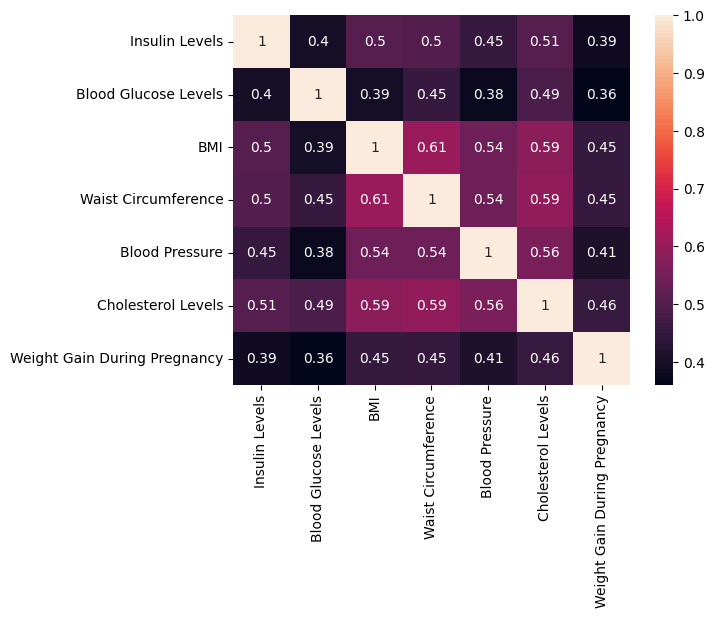

In [8]:
sns.heatmap(df.corr(numeric_only = True),annot = True)

**Univariate Analysis**

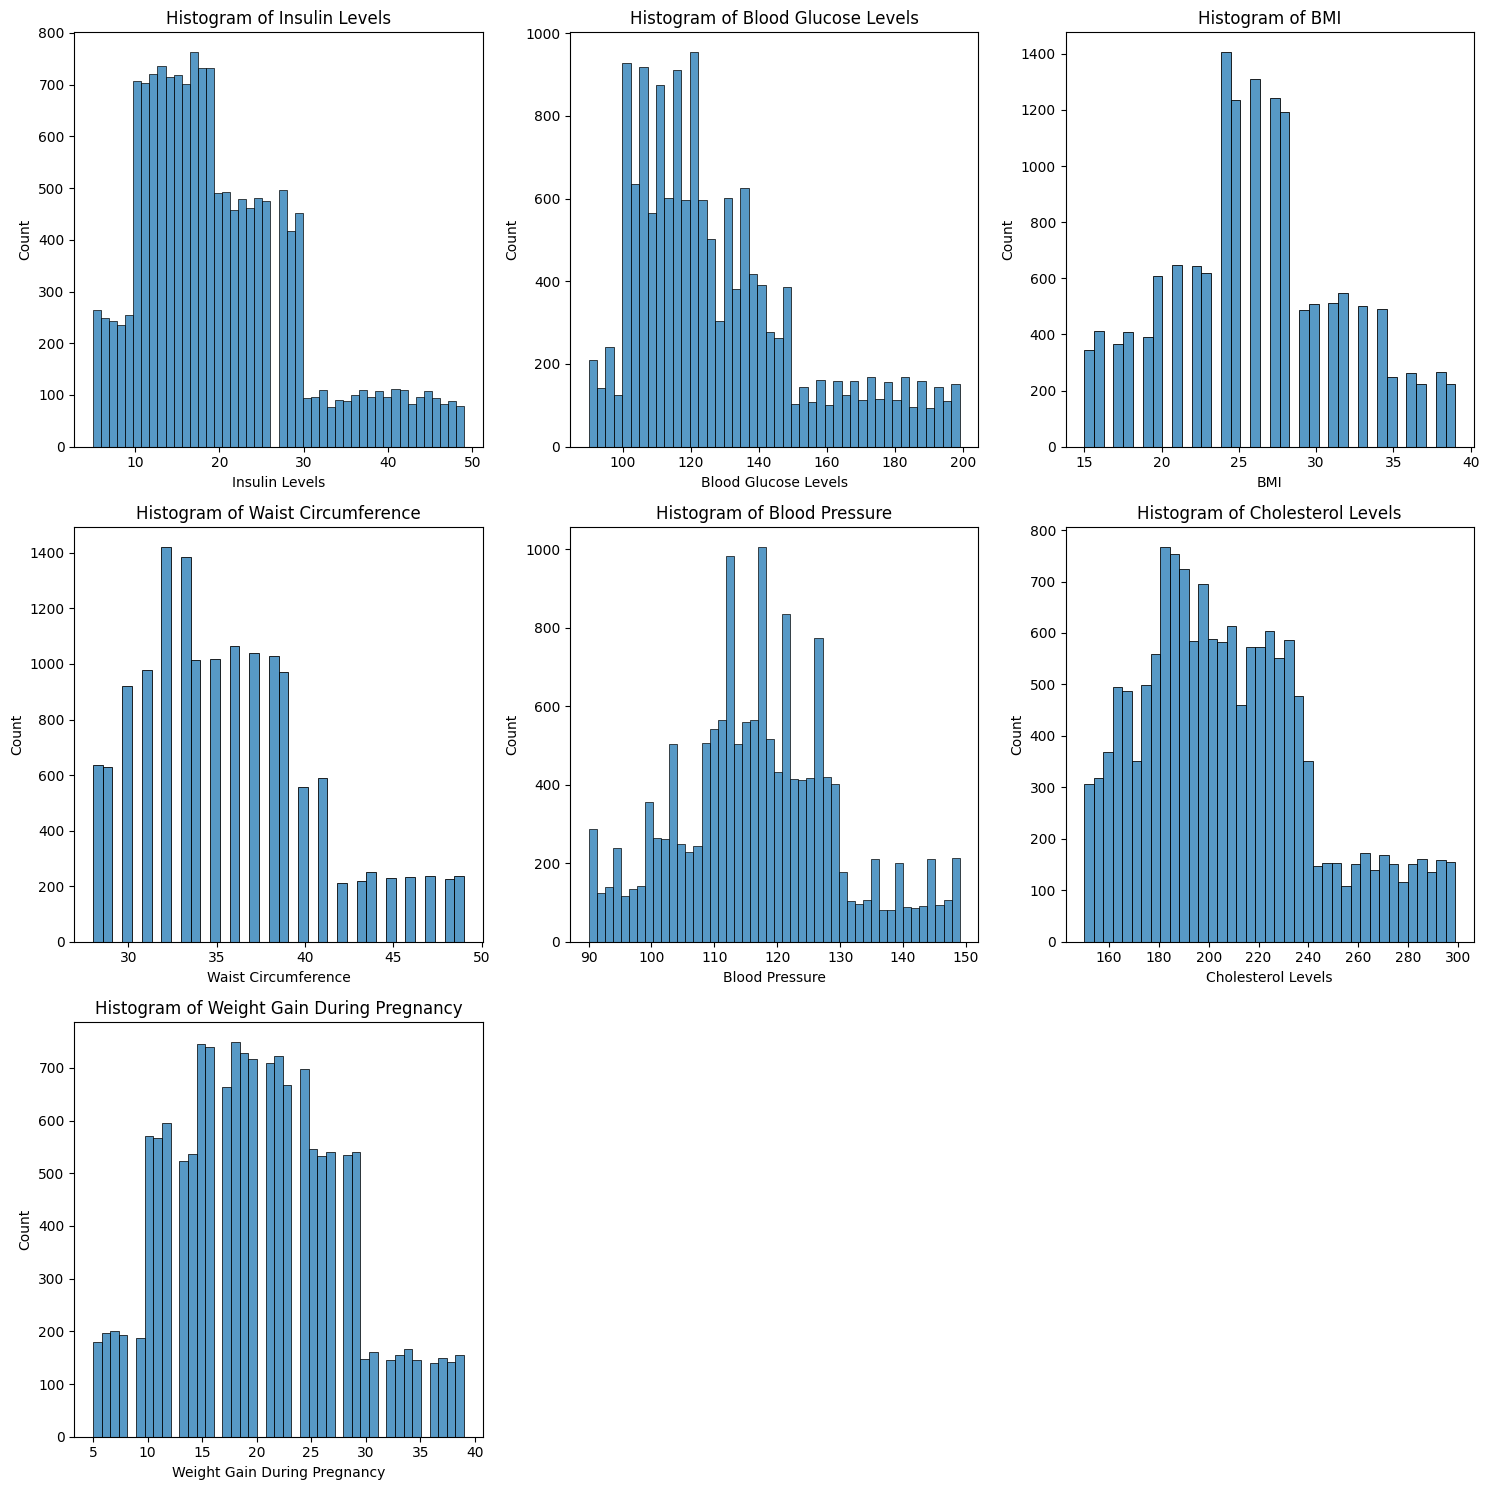

In [9]:

numerical_features = df.select_dtypes(include=np.number).columns
num_plots = len(numerical_features)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col])
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()


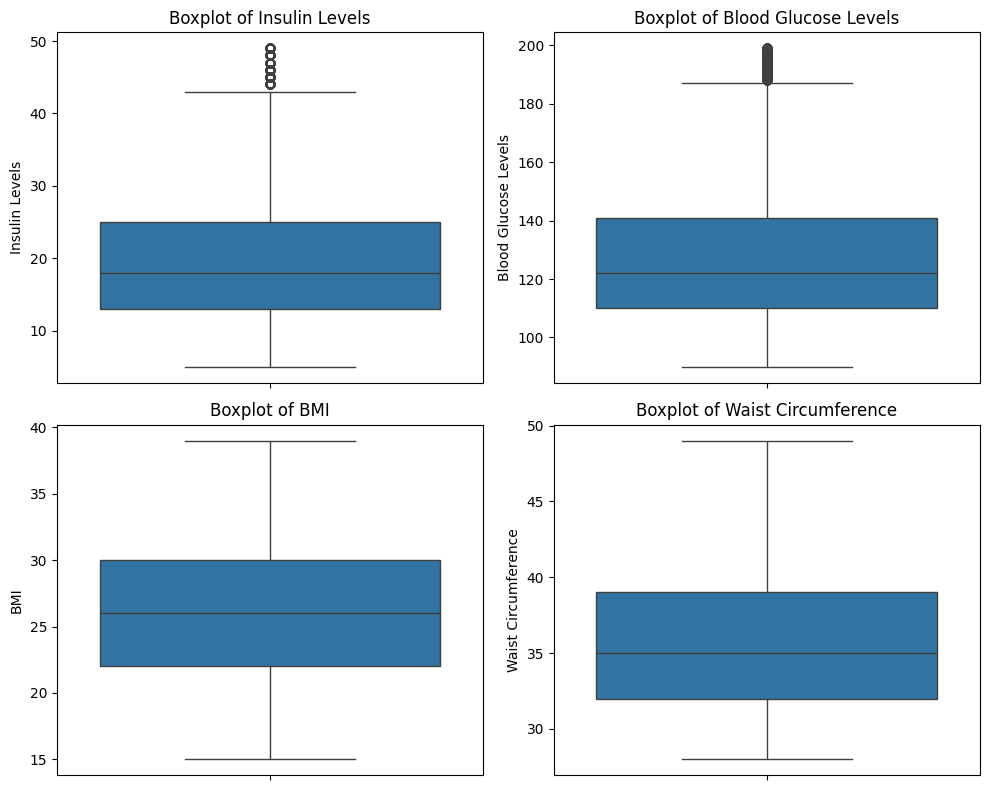

In [10]:


fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_features[:4]):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


**Bivariate Analysis**

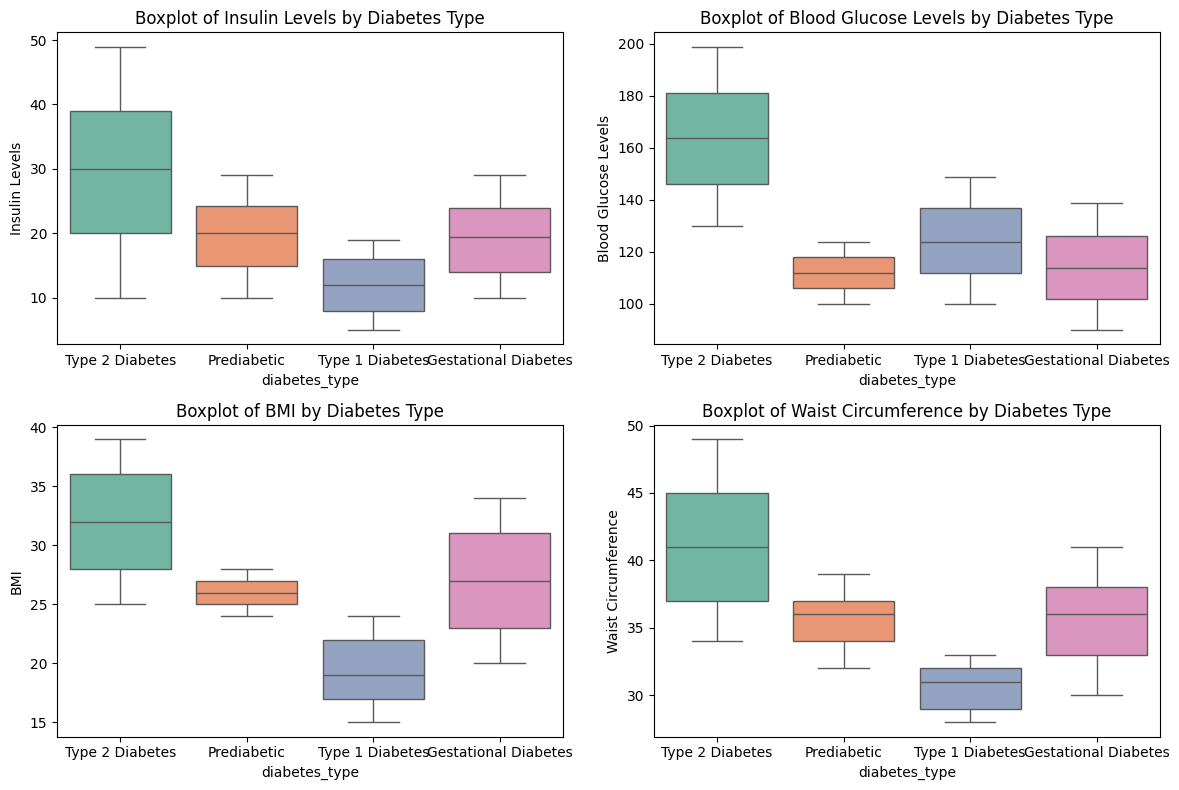

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_features[:4]):
    sns.boxplot(x='diabetes_type', y=df[col], data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Boxplot of {col} by Diabetes Type')

plt.tight_layout()
plt.show()


**Multivariate Analysis**

In [22]:
df.head()

,Genetic Markers,Family History,Insulin Levels,Blood Glucose Levels,Glucose Tolerance Test,BMI,Waist Circumference,Physical Activity,Dietary Habits,Smoking Status,Alcohol Consumption,Blood Pressure,Cholesterol Levels,Liver Function Tests,Previous Gestational Diabetes,Pregnancy History,Weight Gain During Pregnancy,Ethnicity,Socioeconomic Factors,diabetes_type
0,Negative,No,33,147,Abnormal,29,34,Moderate,Healthy,Non-Smoker,High,125,207,Normal,No,Complications,28,Low Risk,Low,Type 2 Diabetes
1,Negative,Yes,20,118,Normal,24,35,High,Unhealthy,Non-Smoker,Moderate,121,210,Normal,Yes,Complications,15,High Risk,Medium,Prediabetic
2,Negative,Yes,14,142,Abnormal,22,30,Low,Healthy,Non-Smoker,Moderate,90,167,Normal,Yes,Complications,13,Low Risk,Low,Type 1 Diabetes
3,Negative,Yes,38,141,Abnormal,27,34,High,Healthy,Smoker,Moderate,119,219,Normal,No,Normal,25,Low Risk,High,Type 2 Diabetes
4,Positive,Yes,20,120,Abnormal,24,36,Low,Unhealthy,Smoker,Moderate,120,223,Normal,Yes,Complications,10,Low Risk,Medium,Gestational Diabetes


In [12]:
data = df.copy()

In [13]:
data['diabetes_type'].value_counts()

,count
diabetes_type,
Type 1 Diabetes,3825
Type 2 Diabetes,3795
Prediabetic,3752
Gestational Diabetes,3722


### **Feature Engineering and Selection**

In [14]:
# Define mappings
activity_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
alcohol_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
ethnicity_mapping = {'Low Risk': 0, 'High Risk': 1}
socioeconomic_mapping = {'Low': 0, 'Medium': 1, 'High': 2}

# Apply mappings
data['PhysicalActivityEnc'] = data['Physical Activity'].map(activity_mapping)
data['AlcoholEnc'] = data['Alcohol Consumption'].map(alcohol_mapping)
data['EthnicityEnc'] = data['Ethnicity'].map(ethnicity_mapping)
data['SocioeconomicFactorsEnc'] = data['Socioeconomic Factors'].map(socioeconomic_mapping)
columns_to_drop = ['Physical Activity', 'Alcohol Consumption', 'Ethnicity', 'Socioeconomic Factors']
data.drop(columns=columns_to_drop, inplace=True)
# Define the mapping dictionary
diabetes_mapping = {
    'Type 1 Diabetes': 0,
    'Type 2 Diabetes': 1,
    'Prediabetic': 2,
    'Gestational Diabetes': 3
}

# Apply the mapping to the 'diabetes_type' column
data['diabetes_type'] = data['diabetes_type'].map(diabetes_mapping)


data.head()

,Genetic Markers,Family History,Insulin Levels,Blood Glucose Levels,Glucose Tolerance Test,BMI,Waist Circumference,Dietary Habits,Smoking Status,Blood Pressure,Cholesterol Levels,Liver Function Tests,Previous Gestational Diabetes,Pregnancy History,Weight Gain During Pregnancy,diabetes_type,PhysicalActivityEnc,AlcoholEnc,EthnicityEnc,SocioeconomicFactorsEnc
0,Negative,No,33,147,Abnormal,29,34,Healthy,Non-Smoker,125,207,Normal,No,Complications,28,1,1,2,0,0
1,Negative,Yes,20,118,Normal,24,35,Unhealthy,Non-Smoker,121,210,Normal,Yes,Complications,15,2,2,1,1,1
2,Negative,Yes,14,142,Abnormal,22,30,Healthy,Non-Smoker,90,167,Normal,Yes,Complications,13,0,0,1,0,0
3,Negative,Yes,38,141,Abnormal,27,34,Healthy,Smoker,119,219,Normal,No,Normal,25,1,2,1,0,2
4,Positive,Yes,20,120,Abnormal,24,36,Unhealthy,Smoker,120,223,Normal,Yes,Complications,10,3,0,1,0,1


In [15]:
features = [
    'Genetic Markers', 'Family History', 'Glucose Tolerance Test', 'Dietary Habits', 'Smoking Status', 'Liver Function Tests', 'Pregnancy History', 'Previous Gestational Diabetes'
]

for feature in features:
    dummies = pd.get_dummies(
        data[feature],
        prefix=feature.replace(" ", "_"),
        drop_first=True,
        dtype=int  # ensures values are integers, not booleans
    )
    data = pd.concat([data.drop(columns=[feature]), dummies], axis=1)



In [16]:
# Define ordinal mappings
activity_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
alcohol_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
ethnicity_mapping = {'Low Risk': 0, 'High Risk': 1}
socioeconomic_mapping = {'Low': 0, 'Medium': 1, 'High': 2}

# Apply ordinal mappings
test['PhysicalActivityEnc'] = test['Physical Activity'].map(activity_mapping)
test['AlcoholEnc'] = test['Alcohol Consumption'].map(alcohol_mapping)
test['EthnicityEnc'] = test['Ethnicity'].map(ethnicity_mapping)
test['SocioeconomicFactorsEnc'] = test['Socioeconomic Factors'].map(socioeconomic_mapping)

# Drop original ordinal columns
columns_to_drop = ['Physical Activity', 'Alcohol Consumption', 'Ethnicity', 'Socioeconomic Factors']
test.drop(columns=columns_to_drop, inplace=True)

# Non-ordinal categorical features (excluding 'diabetes_type')
non_ordinal_features = [
    'Genetic Markers', 'Family History', 'Glucose Tolerance Test', 'Dietary Habits',
    'Smoking Status', 'Liver Function Tests', 'Pregnancy History',
    'Previous Gestational Diabetes'
]

# Apply one-hot encoding with consistent column naming
for feature in non_ordinal_features:
    dummies = pd.get_dummies(
        test[feature],
        prefix=feature.replace(" ", "_"),
        drop_first=True,
        dtype=int
    )
    test = pd.concat([test.drop(columns=[feature]), dummies], axis=1)

### **Model Building and Evaluation**

In [17]:
X = data.drop('diabetes_type', axis=1)
y = data['diabetes_type']


In [18]:
from sklearn.preprocessing import StandardScaler
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [19]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix

# Define models
models = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis()
}

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')

    # Print results
    print(f"Model: {name}")
    print(f"  Training Accuracy: {train_acc:.4f}")
    print(f"  Validation Accuracy: {val_acc:.4f}")
    print(f"  Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")



Model: Gradient Boosting
  Training Accuracy: 0.9820
  Validation Accuracy: 0.9844
  Cross-Validation Accuracy: 0.9814 ± 0.0022
Model: Random Forest
  Training Accuracy: 1.0000
  Validation Accuracy: 0.9854
  Cross-Validation Accuracy: 0.9818 ± 0.0018
Model: K-Nearest Neighbors
  Training Accuracy: 0.8351
  Validation Accuracy: 0.7469
  Cross-Validation Accuracy: 0.7553 ± 0.0087
Model: Quadratic Discriminant Analysis
  Training Accuracy: 0.9458
  Validation Accuracy: 0.9500
  Cross-Validation Accuracy: 0.9434 ± 0.0050


#### **Model Results**
The results of the models are as follows:

| Model                          | Training Accuracy | Validation Accuracy | Cross-Validation Accuracy (± Std) |
|-------------------------------|-------------------|---------------------|-----------------------------------|
| Gradient Boosting             | 0.9820            | 0.9844              | 0.9814 ± 0.0022                   |
| Random Forest                 | 1.0000            | 0.9854              | 0.9818 ± 0.0018                   |
| K-Nearest Neighbors           | 0.8351            | 0.7469              | 0.7553 ± 0.0087                   |
| Quadratic Discriminant Analysis | 0.9458          | 0.9500              | 0.9434 ± 0.0050                   |


In [20]:

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_val)
y_pred_proba = rf_model.predict_proba(X_val)


<Axes: >

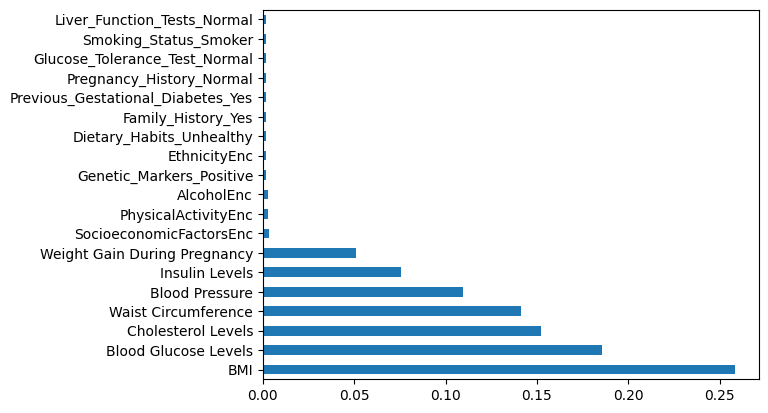

In [21]:
# series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf_model.feature_importances_, index=test.columns).sort_values(ascending=False)

# Plot bar chart
feature_importances.plot.barh()